# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import pandas as pd
from config import weather_api_key, g_key
# to generate list of cities
from citipy import citipy
# to generate random coordinates
from random import seed, randint

## Generate Cities List

In [6]:
# Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
# Longitude values are measured relative to the prime meridian. They range from -180° when traveling west to 180° when traveling east. 
# Some random coordinates

seed(1)
coordinates = []
for _ in range(600):
    coordinates.append([randint(-90, 90), randint(-180, 180)])


cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

cities_in = []
for city in cities:
    country_code = city.country_code
    cities_in.append(city.city_name)
    #print(f"The country code of {name} is '{country_code}'.")




### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [26]:
# set up lists to hold reponse info
cities_out = []
lat = []
lon = []
temp_max = []
humid = []
cloud = []
wind = []


# Loop through the list of cities and perform a request for data on each
for city in cities_in:
    response = requests.get(query_url + city).json()
    
    # try and retrieve weather data for each city
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        cities_out.append(city)

        print(f"Processing Record --- of Set --- | {city}")
        
    # exception for cities not in list
    except:
        print("City not found.  Skipping...")

Processing Record --- of Set --- | albany
Processing Record --- of Set --- | ushuaia
Processing Record --- of Set --- | saint-philippe
Processing Record --- of Set --- | chabahar
City not found.  Skipping...
Processing Record --- of Set --- | rikitea
Processing Record --- of Set --- | kapaa
Processing Record --- of Set --- | asbe teferi
Processing Record --- of Set --- | egvekinot
City not found.  Skipping...
Processing Record --- of Set --- | yacuiba
Processing Record --- of Set --- | norman wells
City not found.  Skipping...
Processing Record --- of Set --- | mataura
Processing Record --- of Set --- | khatanga
Processing Record --- of Set --- | bredasdorp
Processing Record --- of Set --- | qaanaaq
Processing Record --- of Set --- | kapaa
Processing Record --- of Set --- | saint andrews
Processing Record --- of Set --- | amod
Processing Record --- of Set --- | saint-augustin
Processing Record --- of Set --- | barcelos
Processing Record --- of Set --- | qaanaaq
Processing Record --- of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# create a data frame from API data
weather_dict = {
    "city": cities_out,
    "latitude": lat,
    "longitude":lon,
    "temp_max_F": temp,
    "humid":humid,
    "cloud":cloud,
    "wind_mph":wind
}
weather_data = pd.DataFrame(weather_dict)
print(weather_data)

# export data to csv
# file_one_df.to_csv("Output/fileOne.csv", index=False, header=True)

               city  latitude  longitude  temp_max_F  humid  cloud  wind_mph
0            albany   42.6001   -73.9662       66.56     96    100      4.03
1           ushuaia  -54.8000   -68.3000       28.06     61     75     21.85
2    saint-philippe  -21.3585    55.7679       73.58     85     24     14.70
3          chabahar   25.2919    60.6430       87.55     73      8      9.22
4           rikitea  -23.1203  -134.9692       72.57     66    100     25.99
..              ...       ...        ...         ...    ...    ...       ...
546           airai   -8.9266   125.4092       69.13     84     45      2.77
547       mentougou   39.9392   116.0917       81.46     87    100      1.97
548           kaduy   59.2000    37.1500       78.84     22      0      8.08
549        hermanus  -34.4187    19.2345       48.79     47      3      1.95
550           kapaa   22.0752  -159.3190       75.81     82     90      4.00

[551 rows x 7 columns]


In [29]:
weather_data.describe()

,latitude,longitude,temp_max_F,humid,cloud,wind_mph
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,9.115288,-1.793726,63.588294,72.656987,59.326679,9.328911
std,41.006303,103.239756,16.668831,20.231576,38.531479,6.934572
min,-54.800000,-179.166700,28.060000,11.000000,0.000000,0.000000
25%,-28.232000,-73.966200,50.360000,61.000000,20.000000,4.230000
50%,7.710200,-11.950000,66.560000,77.000000,75.000000,7.400000
75%,42.884900,97.559600,75.450000,88.000000,96.000000,12.660000
max,77.484000,179.316700,102.360000,100.000000,100.000000,30.850000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [37]:
# Create dictionary of plot titles and y-axis labels
plot_labels = {'temp_max_F': ['Maximum Temperature vs Latitude','Maximum Temperature (deg F)'], 
                'humid': ['Humidity vs Latitude','Humidity (%)'], 
                'cloud': ['Cloudiness vs Latitude','Cloudiness (%)'], 
                'wind_mph': ['Wind Speed vs Latitude','Wind Speed (mph)']
                }

plot_list = ['temp_max_F', 'humid', 'cloud', 'wind_mph']



['Maximum Temperature vs Latitude', 'Maximum Temperature (deg F)']

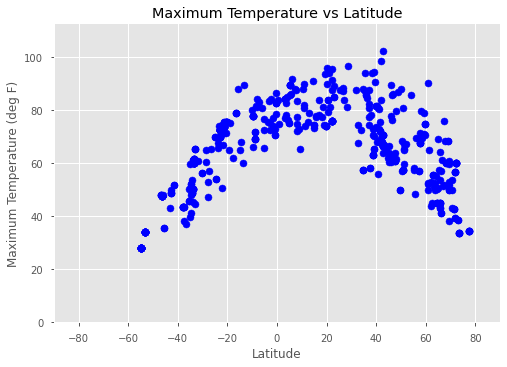

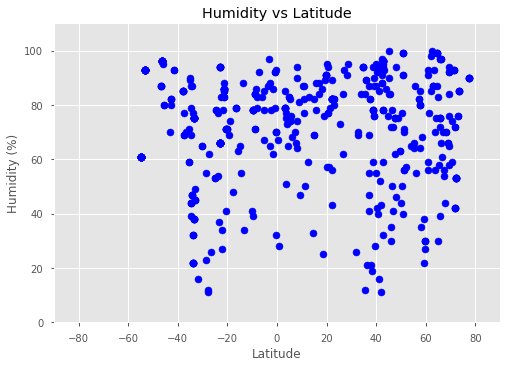

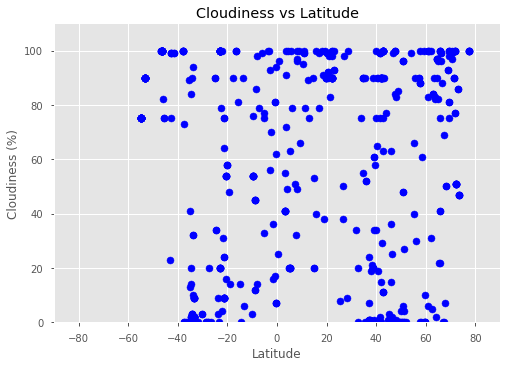

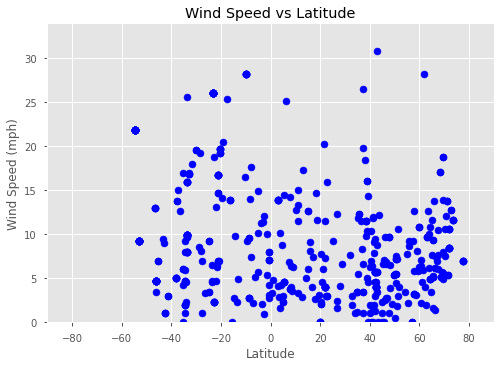

In [41]:
for plot in plot_list:
    fig, ax = plt.subplots()
    
    x_values = weather_data["latitude"]
    y_values = weather_data.loc[:, plot]

    ax.scatter(x_values,y_values, marker = "o", color = 'b')

    ax.set_xlim(-90,90)
    ax.set_ylim(0, y_values.max() * 1.1)
    
    ax.set_title(plot_labels[plot][0])
    ax.set_xlabel("Latitude")
    ax.set_ylabel(plot_labels[plot][1])

    plt.style.use("ggplot")

    plt.show()

# note : need to save plots as png    

# note: need to write discussion of plots

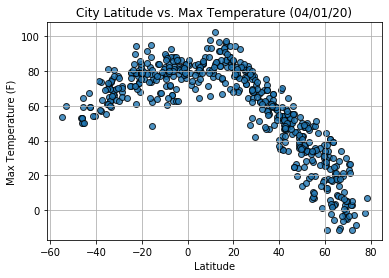

## Latitude vs. Humidity Plot

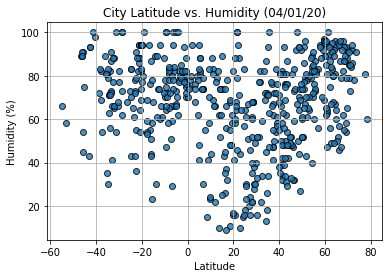

## Latitude vs. Cloudiness Plot

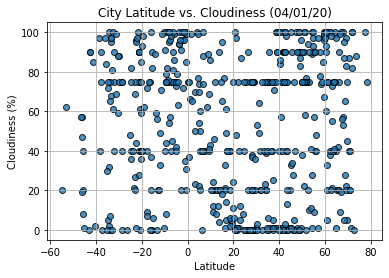

## Latitude vs. Wind Speed Plot

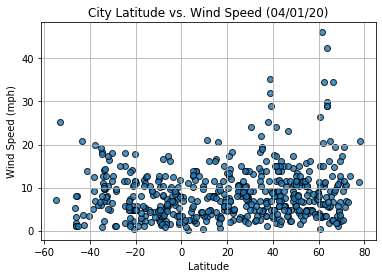

## Linear Regression

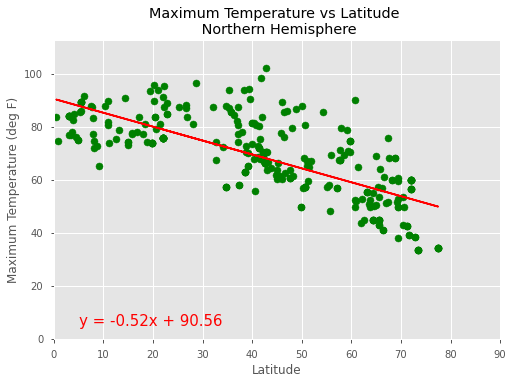

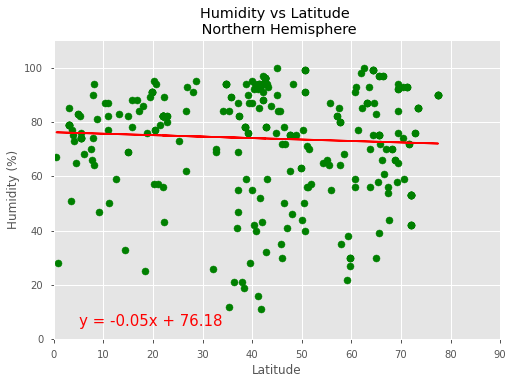

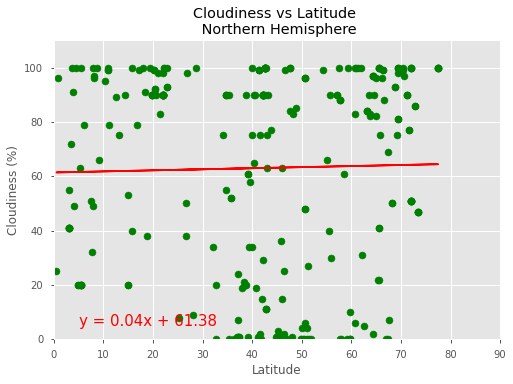

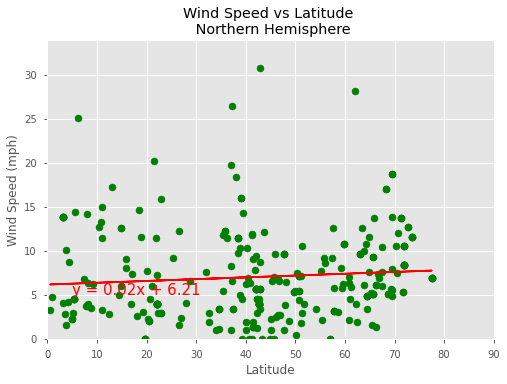

In [48]:
for plot in plot_list:
    fig, ax = plt.subplots()
    
    x_values = weather_data.loc[weather_data["latitude"]>0]["latitude"]
    y_values = weather_data.loc[weather_data["latitude"]>0, plot]
    ax.scatter(x_values,y_values, marker = "o", color = 'g')

    ax.set_xlim(0,90)
    ax.set_ylim(0, y_values.max() * 1.1)
    
    ax.set_title(f"{plot_labels[plot][0]} \n Northern Hemisphere")
    ax.set_xlabel("Latitude")
    ax.set_ylabel(plot_labels[plot][1])

    # add linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.plot(x_values,regress_values,"r-")
    ax.annotate(line_eq,(5,5),fontsize=15,color="red")
    
    plt.style.use("ggplot")

    plt.show()

# save fig to file

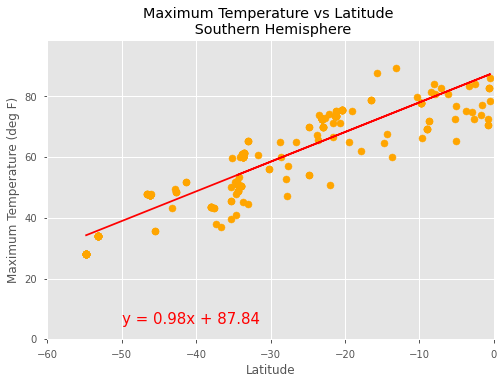

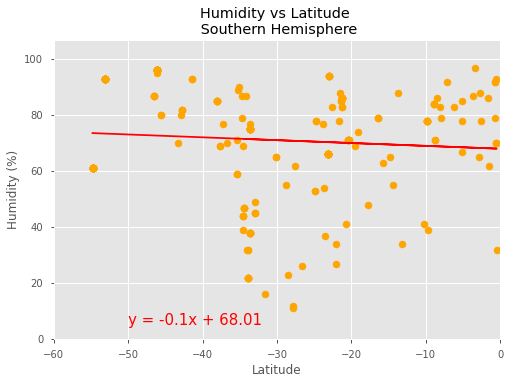

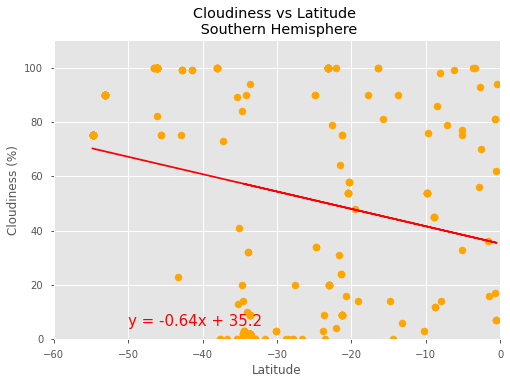

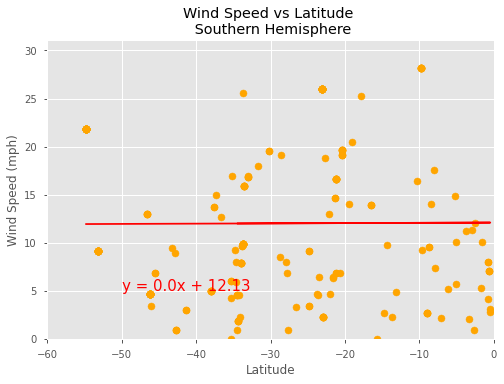

In [50]:
for plot in plot_list:
    fig, ax = plt.subplots()
    
    x_values = weather_data.loc[weather_data["latitude"]<0]["latitude"]
    y_values = weather_data.loc[weather_data["latitude"]<0, plot]
    ax.scatter(x_values,y_values, marker = "o", color = 'orange')

    ax.set_xlim(-60, 0)
    ax.set_ylim(0, y_values.max() * 1.1)
    
    ax.set_title(f"{plot_labels[plot][0]} \n Southern Hemisphere")
    ax.set_xlabel("Latitude")
    ax.set_ylabel(plot_labels[plot][1])

    # add linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.plot(x_values,regress_values,"r-")
    ax.annotate(line_eq,(-50,5),fontsize=15,color="red")
    
    plt.style.use("ggplot")

    plt.show()

# save fig to file

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


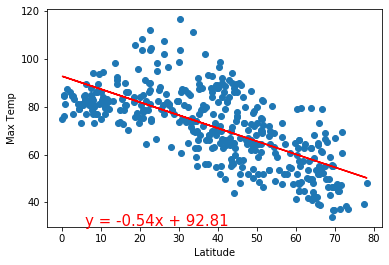

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


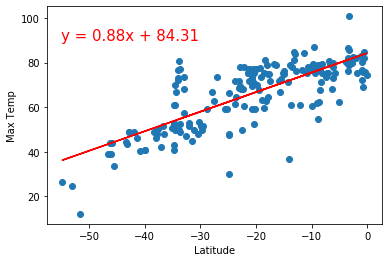

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


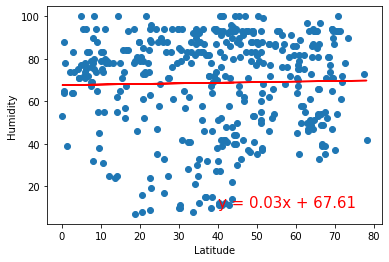

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


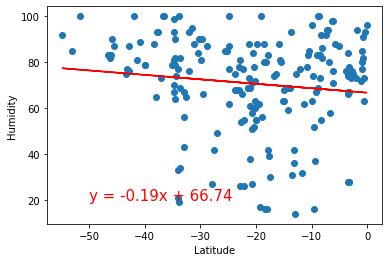

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


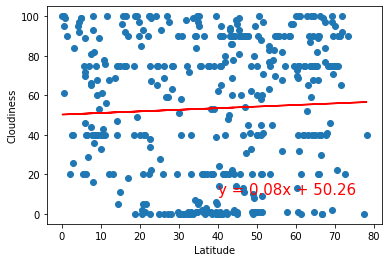

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


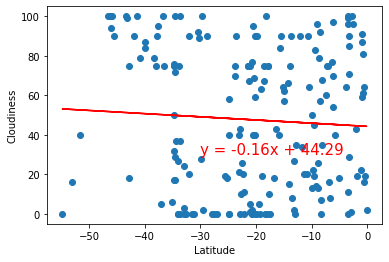

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


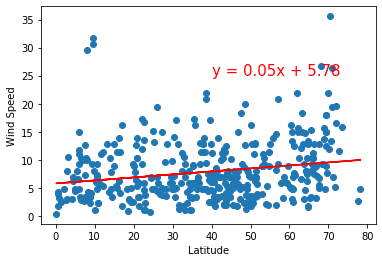

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


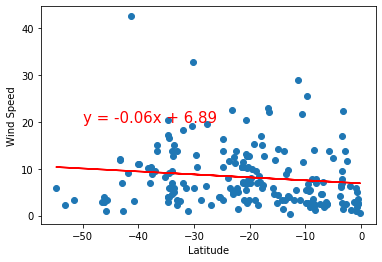